In [1]:
import os
from utils.auxiliary_func import *
from utils.plots_func import *
import config.const as const
import config.params as params
import tifffile 
import ast

## Define Parameters

In [2]:
figure_1_dir = os.path.join(const.BASE_DIR, 'figure_results', 'Figure 1')
os.makedirs(figure_1_dir, exist_ok=True)

DATA_PREPARATION_DIR = const.DATA_PREPARATION_DIR

## Plot FLIM Image processing workflow

**Note**  
The following image outputs are generated as part of *Figure_1_preparation.ipynb* notebook (**Create FLIM Image processing**):

- **Segmentation map** – black background with gray segmentation labels  
- **Quality control segmentation map** – shows removed and retained nuclei regions  
- **Single-nucleus lifetime image** – per-nucleus average lifetime values

To plot **fluorescence lifetime** and **fluorescence intensity** images, you must first run the preprocessing step, which generates the required split data.

In [18]:
## Define Parameters
leap_num = '043'
center_point = (1300,8300) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/full_image_seg_qc.png
Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/zoomed_image_seg_qc.png


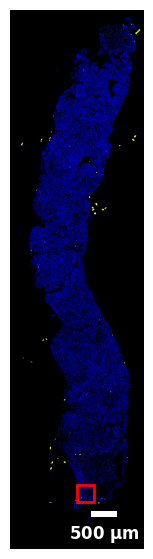

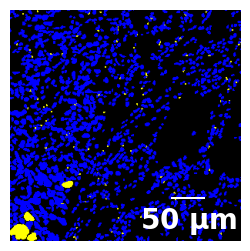

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/full_image_seg.png
Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/zoomed_image_seg.png


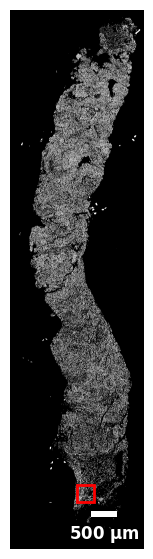

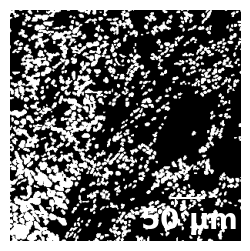

Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/full_image_lifetime.png
Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/zoomed_image_lifetime.png
Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/colorbar_lifetime.pdf


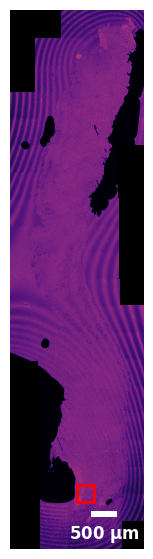

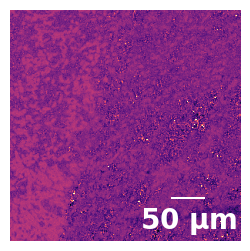

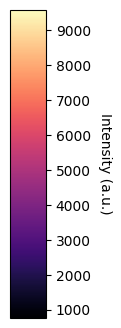

Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/full_image_fluorescent_intensity.png
Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/zoomed_image_fluorescent_intensity.png
Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/colorbar_fluorescent_intensity.pdf


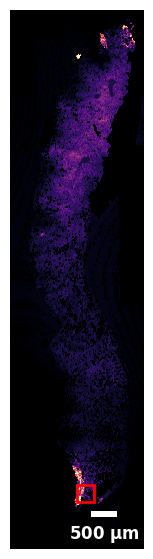

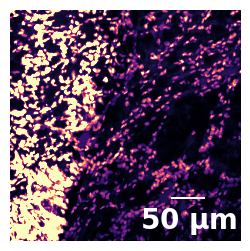

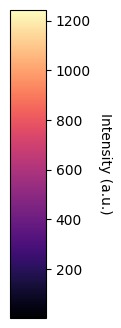

Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/full_image_single_nuclei_lifetime.png
Figure saved as png at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/zoomed_image_single_nuclei_lifetime.png
Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/colorbar_single_nuclei_lifetime.pdf


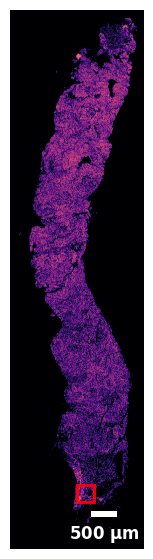

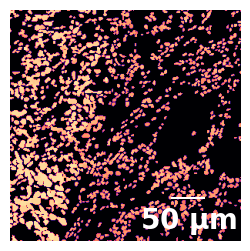

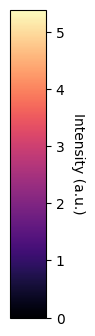

In [19]:
seg_qc_path = os.path.join(figure_1_dir , f"LEAP{leap_num}quality_control.tif") 
plot_full_and_zoom_separately_with_colorbar(seg_qc_path,
    save_full_name="full_image_seg_qc",
    save_zoom_name="zoomed_image_seg_qc",
    center=center_point,
    save_dir=figure_1_dir,
    color_bar=False)

seg_path = os.path.join(figure_1_dir , f"LEAP{leap_num}_seg_binary_values.tif") 
plot_full_and_zoom_separately_with_colorbar(seg_path,
    save_full_name="full_image_seg",
    save_zoom_name="zoomed_image_seg",
    center=center_point,
    save_dir=figure_1_dir,
    color_bar=False)


fluorescent_lifetime_path = os.path.join(const.FLIM_DIR, f'LEAP{leap_num}_flim.tif')
plot_full_and_zoom_separately_with_colorbar(fluorescent_lifetime_path,
    save_full_name="full_image_lifetime",
    save_zoom_name="zoomed_image_lifetime",
    save_colorbar_name="colorbar_lifetime",
    center=center_point,
    save_dir=figure_1_dir,
    using_mask=True)


fluorescent_intensity_path = os.path.join(const.FLUORESCENT_DIR, f'LEAP{leap_num}_fluorescent.tif')
plot_full_and_zoom_separately_with_colorbar(fluorescent_intensity_path,
    save_full_name="full_image_fluorescent_intensity",
    save_zoom_name="zoomed_image_fluorescent_intensity",
    save_colorbar_name="colorbar_fluorescent_intensity",
    save_dir=figure_1_dir,
    center=center_point,
    using_mask=True)

single_nuclei_lifetime_path = os.path.join(figure_1_dir, f'Leap{leap_num}_single_lifetime.tif')
plot_full_and_zoom_separately_with_colorbar(single_nuclei_lifetime_path,
    save_full_name="full_image_single_nuclei_lifetime",
    save_zoom_name="zoomed_image_single_nuclei_lifetime",
    save_colorbar_name="colorbar_single_nuclei_lifetime",
    save_dir=figure_1_dir,
      center=center_point)

## Median lifetime result

In [3]:
df_median_file_path = os.path.join(DATA_PREPARATION_DIR, "features_median_data_core.csv")
median_df = pd.read_csv(df_median_file_path, dtype={'leap_ID': str})
median_df.head(2)

,leap_ID,lifetime_mean,area,extent,solidity,perimeter,diameter_area,convex_hull_area,minor_axis_length,perimeter_crofton,major_axis_length,orientation,diameter_max,eccentricity,density_radius_20,density_radius_40,density_radius_60,density_radius_80,category
0,015,3.915147,16.0,0.75,0.954545,12.242641,4.513517,17.0,3.669612,14.518306,5.449354,0.000000,5.385165,0.713180,0.007958,0.005769,0.005040,0.004526,non responder
1,017,4.177300,18.0,0.75,0.944444,13.656854,4.787307,20.0,3.991464,16.184387,6.065440,0.084918,6.324555,0.722862,0.019099,0.018104,0.016977,0.016015,non responder


/home/reutme/.conda/envs/flim_stardist/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/reutme/.conda/envs/flim_stardist/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):



T-statistic: 1.4469930995669473
P-value: 0.15488698867166756
lifetime_mean auc - 0.6391304347826087 

Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/median_lifetime_box_plot.pdf


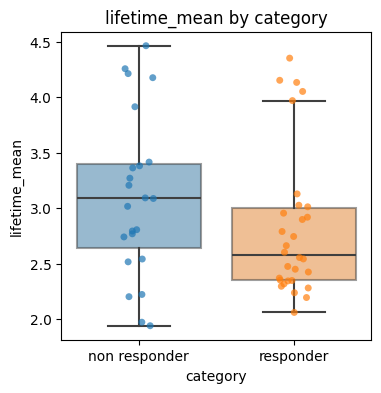

In [4]:
plt_fig = category_seperation_by_feature(median_df, 'lifetime_mean', {'non responder': 1, 'responder': 0})
save_file_path = os.path.join(const.BASE_DIR, 'figure_results', 'Figure 1')
save_file_name= "median_lifetime_box_plot"
save_fig(save_file_path, save_file_name, 'pdf', plt_fig)

## Plot ROC curve combined median & lifetime distribution

In [5]:
## Define Parameters
bin_amount = 18
model_name = 'xgboost'

ROC-AUC of bin nums : 18
Median AUC: 0.7347826086956522
Figure saved as PDF at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 1/roc_curve_full_tissue_combined_lifetime_dist_median.pdf


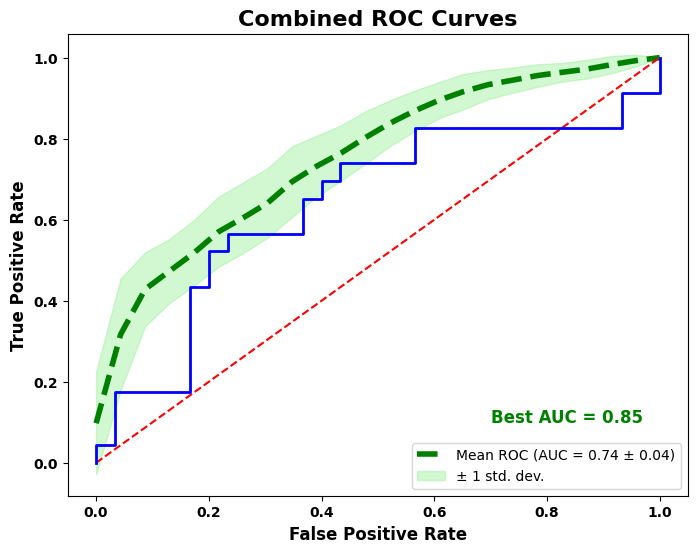

In [6]:
print(f"ROC-AUC of bin nums : {bin_amount}")

model_results_name = f'bins_{bin_amount}_lifetime_distribution_model_results_tissue_wise.csv'
distribution_model_results = os.path.join(DATA_PREPARATION_DIR, model_results_name)

model_results_df = pd.read_csv(distribution_model_results)
model_results_df['fpr'] = model_results_df['fpr'].apply(ast.literal_eval)
model_results_df['tpr'] = model_results_df['tpr'].apply(ast.literal_eval)

seeds, auc_list, fpr_list, tpr_list = model_results_df['seed_val'], model_results_df['auc'], model_results_df['fpr'], model_results_df['tpr']

# Prepare extra ROC from median_df
median_df['binary_label'] = median_df['category'].map({'non responder': 1, 'responder': 0})
y_true = median_df['binary_label']
y_scores = median_df['lifetime_mean']

extra_fpr, extra_tpr, _ = roc_curve(y_true, y_scores)
extra_auc = roc_auc_score(y_true, y_scores)

save_file_path = os.path.join(const.BASE_DIR, 'figure_results', 'Figure 1')

# Plot both ROC curves
plot_mean_auc_roc_lists(
    fpr_list, tpr_list, auc_list,
    std_num=1,
    save_file_path=save_file_path,
    save_file_name="roc_curve_full_tissue_combined_lifetime_dist_median",
    title='Combined ROC Curves',
    extra_fpr=extra_fpr,
    extra_tpr=extra_tpr,
    extra_auc=extra_auc,
    extra_label='Single Lifetime Feature (AUC = {:.2f})'.format(extra_auc)
)
